In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import seaborn as sns
from scipy.stats import ttest_ind
import pandas as pd
import statannot
import math
plt.rcParams.update({'font.size': 22})

## Neuropixels Stringer 

In [7]:
# Change when files updated
f = scipy.io.loadmat(f'./data/StringerNeuropixels/KrebswithFaces_KS2.mat')
area_labels = [x[0] for x in f['areaLabels'][0]]
locations = f['brainLoc']

In [ ]:
### Save in different format

In [35]:
metrics = ['sample_entropy', 'approximate_entropy', 'fuzzy_entropy', 'weighted_permutation_entropy',
           'fractal_dimension_katz', 'fisher_information']

mice = ['Krebs',  'Robbins', 'Waksman']

for mouse in mice:
    print(mouse, end=',')
    f = scipy.io.loadmat(f'./data/StringerNeuropixels/{mouse}withFaces_KS2.mat')
    area_labels = [x[0] for x in f['areaLabels'][0]]
    locations = f['brainLoc']
    ds = []
    for i in range(4):
        ds.append(np.load(f'./results/Entropy/Entropy_Stringer_neuropixels_{mouse}_{i}.npz'))
    for metric in metrics:
        print(metric, end='. ')
        entropy_results, entropy_random = [], []
        for d in ds:
            entropy_results.append(d[metric])
            entropy_random.append(d[f'{metric}_random'])
        entropy_results = np.concatenate(entropy_results, axis=0)
        entropy_random = np.concatenate(entropy_random, axis=1)
        d_dict = dict(d)
        d_new = {metric: entropy_results, 
                f'{metric}_random': entropy_random, 
                'meta_data': {
                    'area_labels': area_labels,
                    'locations': locations,
                    'initial_frame': d_dict['initial_frame'],
                    'steps': d_dict['steps'],
                    'n_shuffles': d_dict['num_shuffles'],
                    'n_inits': d_dict['n_inits'],
                    'seed': d_dict['seed'],
                    'shape': d_dict['shape'],
                    'shape_rand': d_dict['shape_rand'],
                    'Hz': d_dict['Hz']                
                }}
        np.savez_compressed(f'./results/Entropy/Entropy_Stringer_neuropixels_{metric}_{mouse}.npz', **d_new)


Krebs,sample_entropy. 0,

BadZipFile: File is not a zip file

In [28]:
entropy_krebs = np.load('./results/Entropy/Entropy_Stringer_neuropixels_Waksman_1.npz')

In [29]:
list(entropy_krebs.keys())

['sample_entropy',
 'sample_entropy_random',
 'approximate_entropy',
 'approximate_entropy_random',
 'fuzzy_entropy',
 'fuzzy_entropy_random',
 'weighted_permutation_entropy',
 'weighted_permutation_entropy_random',
 'fractal_dimension_katz',
 'fractal_dimension_katz_random',
 'fisher_information',
 'fisher_information_random',
 'initial_frame',
 'steps',
 'num_shuffles',
 'n_inits',
 'seed',
 'shape',
 'shape_rand',
 'Hz']

In [30]:
entropy_krebs['sample_entropy_random'].shape

(10, 5, 2688, 300)

In [6]:
entropy_krebs['shape']

array(['n_inits', 'n_neurons', 'steps'], dtype='<U9')

In [36]:
metric = 'sample_entropy'
fig, axs = plt.subplots(figsize=(16,16), ncols=4, nrows=4, sharex=True, sharey=True)
mice = ['Krebs',  'Robbins', 'Waksman']
mouse_colors = [['crimson', 'pink'], ['dodgerblue', 'lightblue'], ['gold', 'beige']]

for mouse, color in zip(mice, mouse_colors):
    print(mouse, end=',')
    f = scipy.io.loadmat(f'./data/StringerNeuropixels/{mouse}withFaces_KS2.mat')
    area_labels = [x[0] for x in f['areaLabels'][0]]
    locations = f['brainLoc']
    entropy_results, entropy_random = [], []
    for i in range(4):
        d = np.load(f'./results/Entropy/Entropy_Stringer_neuropixels_{mouse}_{i}.npz')
        entropy_results.append(d[metric])
        entropy_random.append(d[f'{metric}_random'])
    entropy_results = np.concatenate(entropy_results, axis=0)
    entropy_random = np.concatenate(entropy_random, axis=1)

    print(entropy_results.shape, entropy_random.shape)
    
    sec_ts = np.arange(d['initial_frame'], d['initial_frame'] + d['steps']) / d['Hz']

    for i, (area_name, ax) in enumerate(zip(area_labels, axs.flat)):
        ax.set_title(area_name)
        neurons = np.where(locations.squeeze() == i + 1)[0]
        if len(neurons) <= 0:
            continue
        diffs = []
        for rand in entropy_random[:, :, neurons]:
            diffs.append((entropy_results[:, neurons] - rand).reshape((-1, rand.shape[-1])))
        mean_diff = np.mean(np.mean(np.ma.masked_invalid(diffs), axis=1), axis=0)
        sd_diff = np.std(np.mean(np.ma.masked_invalid(diffs), axis=1), axis=0)
        ax.plot(sec_ts, mean_diff, color=color[0])
        ax.fill_between(sec_ts, mean_diff - 3 * sd_diff, mean_diff + 3 * sd_diff, color=color[1], alpha=.5)
        ax.set_ylabel(f'Difference {metric}')
        ax.set_xlabel('Time (sec)')
        ax.axhline(0, ls='--', c='dimgray')
fig.suptitle(metric)
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (348656797.py, line 31)

entropy shapes (20, 1462, 300) (10, 20, 1462, 300)


/var/folders/b5/yg7165490n3bjfx70qmtgl1r0000gn/T/ipykernel_73578/2425883863.py:24: RuntimeWarning: invalid value encountered in subtract
  diffs.append((entropy_results - rand).reshape((-1, rand.shape[-1])))
/var/folders/b5/yg7165490n3bjfx70qmtgl1r0000gn/T/ipykernel_73578/2425883863.py:41: RuntimeWarning: invalid value encountered in subtract
  diffs.append((entropy_results[:, neurons] - rand).reshape((-1, rand.shape[-1])))


entropy shapes (20, 2296, 300) (10, 20, 2296, 300)
entropy shapes (20, 2688, 300) (10, 20, 2688, 300)


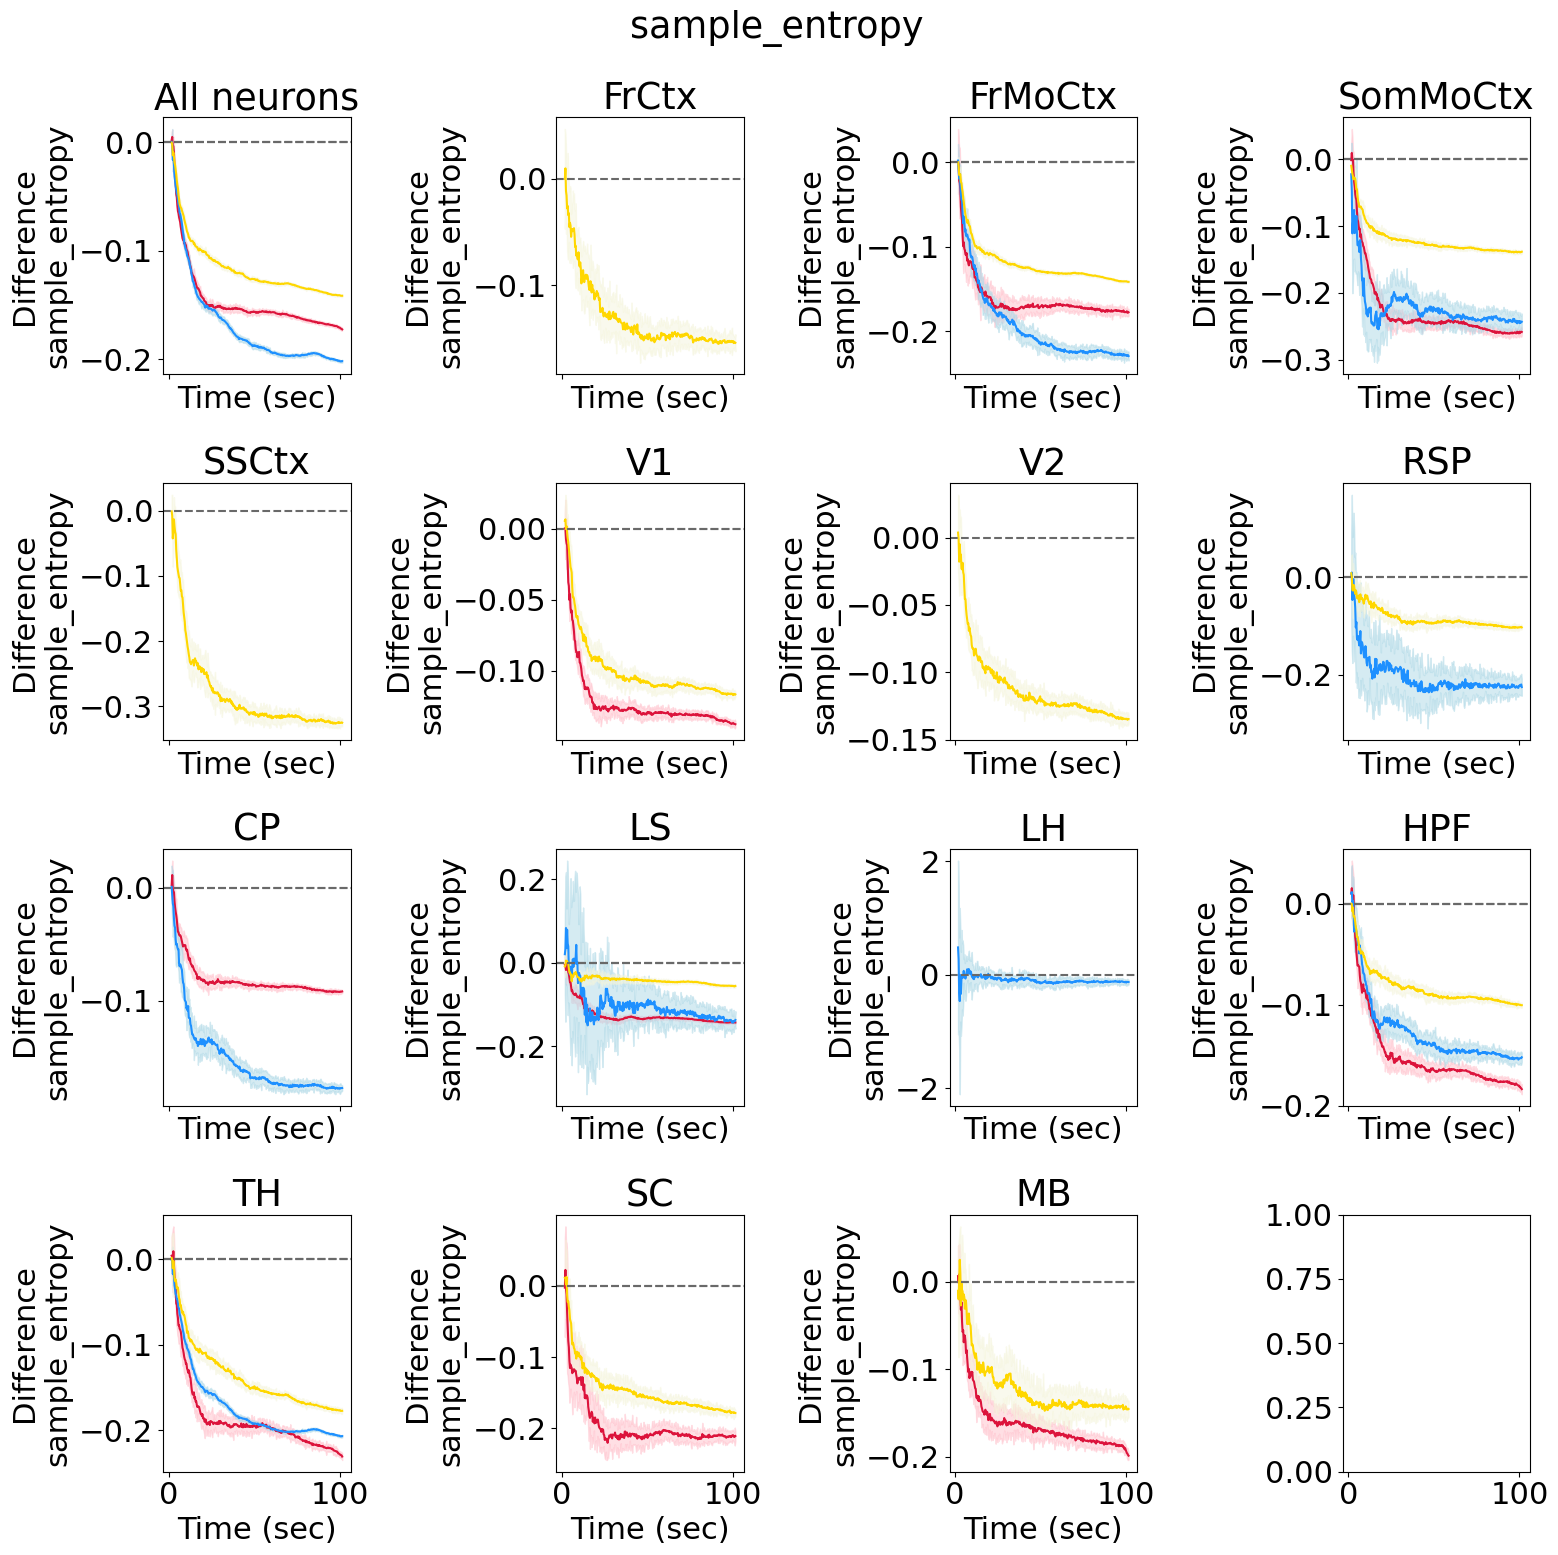

FileNotFoundError: [Errno 2] No such file or directory: './results/Entropy/Entropy_Stringer_neuropixels_approximate_entropy_Krebs.npz'

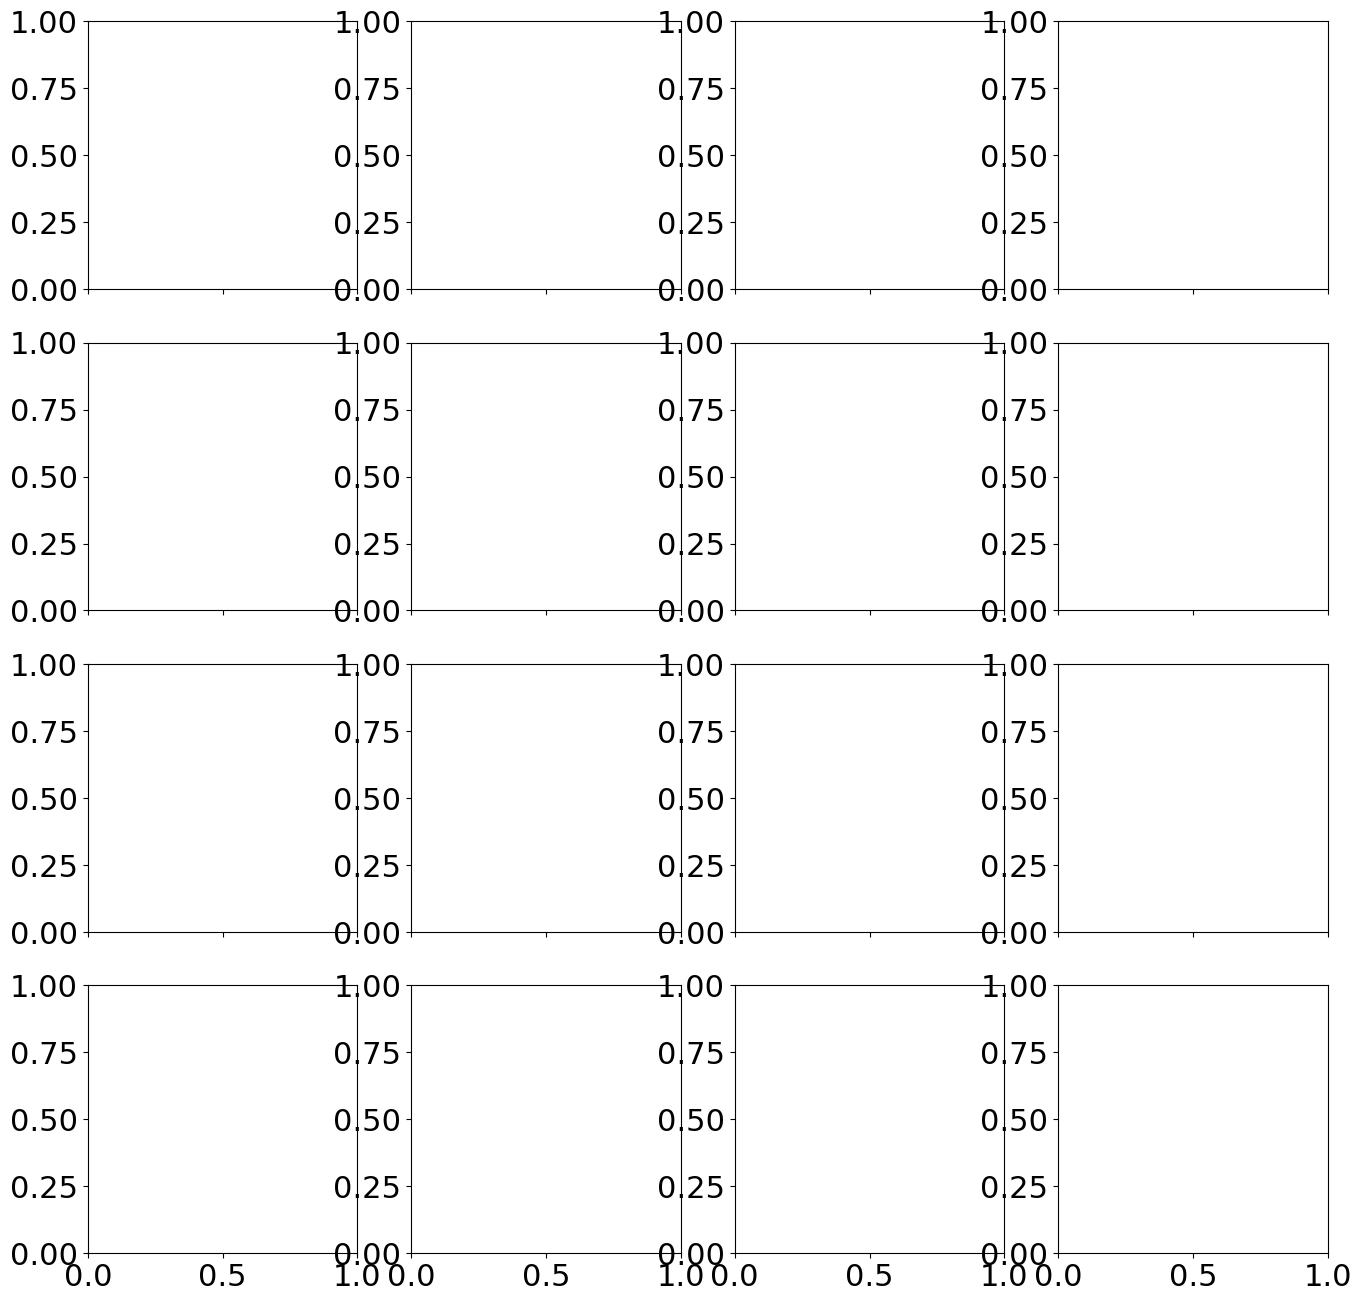

In [43]:
mice = ['Krebs',  'Robbins', 'Waksman']
mouse_colors = [['crimson', 'pink'], ['dodgerblue', 'lightblue'], ['gold', 'beige']]
metrics = ['sample_entropy', 'approximate_entropy', 'fuzzy_entropy', 'weighted_permutation_entropy',
           'fractal_dimension_katz', 'fisher_information']

for metric in metrics:
    fig, axs = plt.subplots(figsize=(16,16), ncols=4, nrows=4, sharex=True)
    for mouse, color in zip(mice, mouse_colors):
        d = np.load(f'./results/Entropy/Entropy_Stringer_neuropixels_{metric}_{mouse}.npz', allow_pickle=True)
        
        entropy_results = d[metric]
        entropy_random = d[f'{metric}_random']
        print('entropy shapes', entropy_results.shape, entropy_random.shape)
        init_frame = d['meta_data'].item()['initial_frame']
        steps = d['meta_data'].item()['steps']
        Hz = d['meta_data'].item()['Hz']
        sec_ts = np.arange(init_frame, init_frame + steps) / Hz
        locations = d['meta_data'].item()['locations']
        area_labels = d['meta_data'].item()['area_labels']
        
        
        diffs = []
        for rand in entropy_random:
            diffs.append((entropy_results - rand).reshape((-1, rand.shape[-1])))
        mean_diff = np.mean(np.mean(np.ma.masked_invalid(diffs), axis=1), axis=0)
        sd_diff = np.std(np.mean(np.ma.masked_invalid(diffs), axis=1), axis=0)
        ax = axs[0, 0]
        ax.plot(sec_ts, mean_diff, color=color[0])
        ax.fill_between(sec_ts, mean_diff - 3 * sd_diff, mean_diff + 3 * sd_diff, color=color[1], alpha=.5)
        ax.set_ylabel(f'Difference\n{metric}')
        ax.set_xlabel('Time (sec)')
        ax.axhline(0, ls='--', c='dimgray')
        ax.set_title('All neurons')
        for i, (area_name, ax) in enumerate(zip(area_labels, axs.flat[1:])):
            ax.set_title(area_name)
            neurons = np.where(locations.squeeze() == i + 1)[0]
            if len(neurons) <= 0:
                continue
            diffs = []
            for rand in entropy_random[:, :, neurons]:
                diffs.append((entropy_results[:, neurons] - rand).reshape((-1, rand.shape[-1])))
            mean_diff = np.mean(np.mean(np.ma.masked_invalid(diffs), axis=1), axis=0)
            sd_diff = np.std(np.mean(np.ma.masked_invalid(diffs), axis=1), axis=0)
            ax.plot(sec_ts, mean_diff, color=color[0])
            ax.fill_between(sec_ts, mean_diff - 3 * sd_diff, mean_diff + 3 * sd_diff, color=color[1], alpha=.5)
            ax.set_ylabel(f'Difference\n{metric}')
            ax.set_xlabel('Time (sec)')
            ax.axhline(0, ls='--', c='dimgray')
        
    fig.suptitle(metric)
    plt.tight_layout()
    plt.show()